#### Test Case
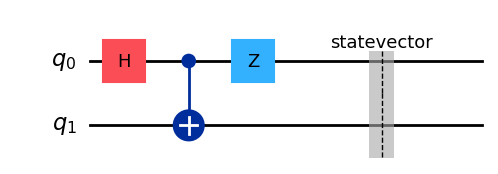

Tested and Working

In [1]:
import qiskit
from qiskit_aer import AerSimulator
from qiskit import transpile, QuantumCircuit
from qiskit_aer import noise
from qiskit.quantum_info import Statevector
import math
from qiskit.visualization import plot_histogram, plot_state_city
import time

In [2]:
class RACSimulator(AerSimulator):
    def __init__(self, method='statevector', configuration=None, properties=None, provider=None, target=None, **backend_options):
        super().__init__(method=method)
        self.initial_state = None

    def run_and_keep(self, qc_i, shots=1024, noise=0, noise_model=None):
        simulator=AerSimulator()
        if noise == 0:
            qc = QuantumCircuit(qc_i.num_qubits)
            if self.initial_state != None:
                qc.set_statevector(self.initial_state)
            qc.compose(qc_i, inplace=True, front=False)
            qc.save_statevector()
            qc = transpile(qc, simulator)
            result = simulator.run(qc, shots=shots).result()
            output_state = result.get_statevector(qc)

        elif noise == 1:
            qc = QuantumCircuit(qc_i.num_qubits)
            if self.initial_state != None:
                qc.set_density_matrix(self.initial_state)
            qc.compose(qc_i,inplace=True,front=False)
            qc.save_density_matrix()
            qc = transpile(qc, simulator)
            result = simulator.run(qc, shots=shots, noise_model=noise_model).result()
            output_state = result.data(0)['density_matrix']

        self.initial_state = output_state

        return result, output_state, qc

In [202]:
simulator = RACSimulator()

qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0,1)
qc1.z(0)
# qc1.save_statevector()
# res = simulator.run(qc1, shots=1024).result()
res_, final_state_, qc_ = simulator.run_and_keep(qc1, shots=1024)
# final_state = res.get_statevector(qc1)
print(final_state_)
# qc1.draw('mpl')

#OUTPUT: run | run_and_keep, outputs the same state vector (part one done)



Statevector([ 0.70710678+0.j, -0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


In [204]:
simulator = RACSimulator()

qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)

result, sv1, qc2 = simulator.run_and_keep(qc2, shots=1024)

qc3 = QuantumCircuit(2)
qc3.z(0)

result2, sv2, qc3 = simulator.run_and_keep(qc3, shots=1024)

print(sv2)



Statevector([ 0.70710678+0.j, -0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))
